<a href="https://colab.research.google.com/github/Madhuanabala/breast-cancer/blob/model-building/Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('/content/combined_dataset_fs_2.csv')
df

,Unnamed: 0,KRFP17,KRFP1146,KRFP1157,KRFP2667,KRFP2986,KRFP3058,KRFP3180,KRFP3360,KRFP3395,...,BCUT2D_CHGHI_1.0,BCUT2D_CHGLO_1.0,BCUT2D_MRHI_2.0,Chi4n_0,PEOE_VSA6_0,SlogP_VSA11_0,RingCount_0,fr_NH0_0,fr_aniline_0,fr_aryl_methyl_0
0,0,1,0,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,1,1,1
1,1,1,1,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,1,1,1
2,2,1,0,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,1,1,1
3,3,0,0,0,0,1,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
4,4,0,0,0,0,1,0,0,0,0,...,1,1,0,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,1812,0,0,0,0,1,1,0,0,0,...,1,0,0,1,1,1,0,1,1,1
1813,1813,0,0,0,0,1,1,0,0,0,...,1,0,0,1,1,1,0,1,1,1
1814,1814,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,0,1,1
1815,1815,0,1,0,0,0,0,1,0,0,...,1,0,0,1,1,1,1,1,0,1


In [23]:
X = df.drop('Unnamed: 0', axis=1)


In [24]:
X = df.drop(["bioactivity_class"], axis=1)
Y = df.bioactivity_class

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [27]:
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [29]:
accuracy = accuracy_score(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred_proba)
clf_report = classification_report(Y_test, y_pred, output_dict=True)

In [30]:
print("Random Forest Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"Classification Report:\n{classification_report(Y_test, y_pred)}")

Random Forest Evaluation Metrics:
Accuracy: 0.8901
AUC: 0.9605
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       249
           1       0.90      0.89      0.90       297

    accuracy                           0.89       546
   macro avg       0.89      0.89      0.89       546
weighted avg       0.89      0.89      0.89       546



In [31]:
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

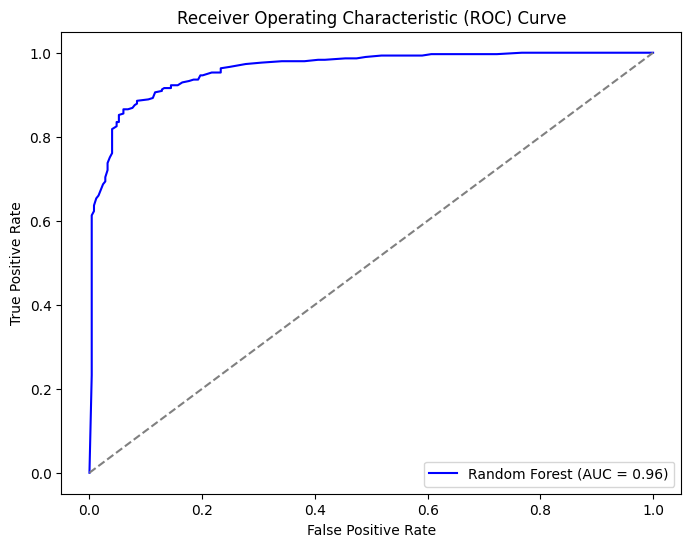

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()